Last digit of my student number: 9


image classes: Face, Hand

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make sure to adjust the path in the next cell.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -q '/content/drive/MyDrive/FaceversusHand.zip'


Mounted at /content/drive


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/FaceversusHand/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(50,50),
  batch_size=16)

Found 266 files belonging to 2 classes.
Using 213 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 '/content/FaceversusHand/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(50,50),
  batch_size=10)

Found 266 files belonging to 2 classes.
Using 53 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Face', 'Hand']


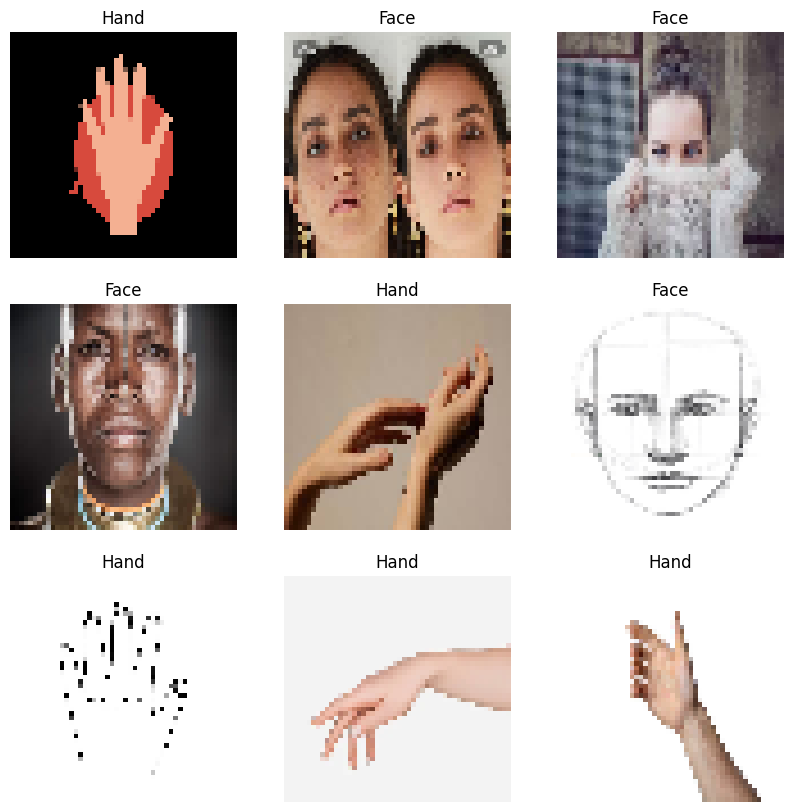

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(50,50,3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalMaxPooling2D(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
14/14 [==============================] - 12s 94ms/step - loss: 0.6836 - accuracy: 0.5399 - val_loss: 0.5998 - val_accuracy: 0.6415
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6325 - accuracy: 0.6573 - val_loss: 0.6316 - val_accuracy: 0.6981
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.7136 - val_loss: 0.4480 - val_accuracy: 0.8491
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5420 - accuracy: 0.7418 - val_loss: 0.4354 - val_accuracy: 0.8679
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5068 - accuracy: 0.7934 - val_loss: 0.4296 - val_accuracy: 0.8491
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4531 - accuracy: 0.8075 - val_loss: 0.4366 - val_accuracy: 0.8113
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.8028 - val_loss: 0.4502 - val_accuracy: 0.7925
Epoch 8/10
14/14 [

The function 'peek_at_layers' is defined below.

In [11]:
layer_outputs = [layer.output for layer in model.layers[1:]]
peek_at_layers = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

Prepare two image to be sent into the trained CNN model.

In [12]:
Hand_example= images[0].numpy().astype("uint8")
Hand_example = Hand_example.reshape(1,50,50,3)
Face_example= images[2].numpy().astype("uint8")
Face_example = Face_example.reshape(1,50,50,3)

Get the maps in the layers of the CNN.

In [13]:
Hand_layers = peek_at_layers.predict(Hand_example)
Face_layers = peek_at_layers.predict(Face_example)

1/1 [==============================] - 0s 18ms/step


We want the input image and 0nd - 5th layer output images

In [14]:
for i in range(9):
  y = Hand_layers[i]
  print(i)
  print(y.shape)

0
(1, 50, 50, 32)
1
(1, 25, 25, 32)
2
(1, 25, 25, 64)
3
(1, 12, 12, 64)
4
(1, 12, 12, 128)
5
(1, 6, 6, 128)
6
(1, 128)
7
(1, 512)
8
(1, 2)


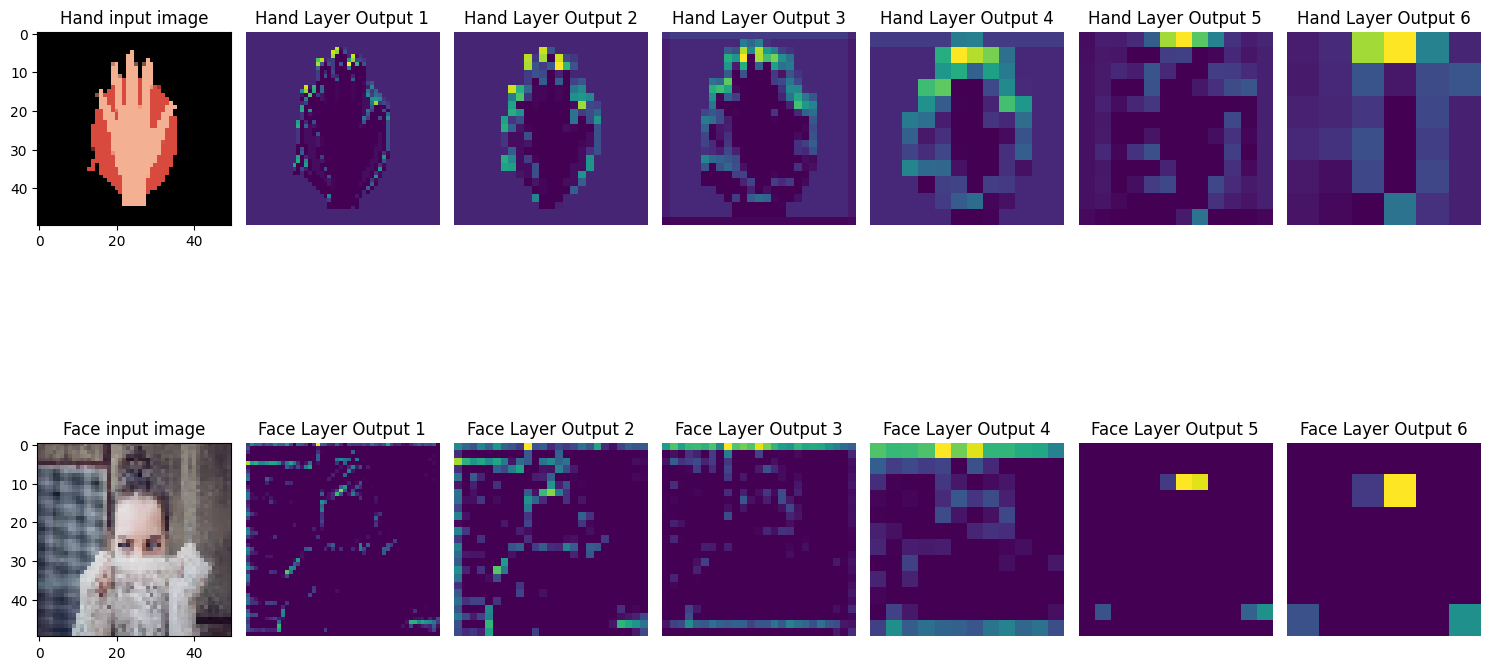

In [16]:
plt.figure(figsize=(15, 10))

# Hand
plt.subplot(2, 7, 1)
plt.imshow(images[0].numpy().astype("uint8"))
plt.title(f"Hand input image")
for i in range(6):
    plt.subplot(2, 7, i + 2)
    pic = Hand_layers[i][0][:, :, 2]
    plt.imshow(pic, cmap='viridis')
    plt.title(f"Hand Layer Output {i+1}")
    plt.axis("off")

# Face
plt.subplot(2, 7, 8)
plt.imshow(images[2].numpy().astype("uint8"))
plt.title(f"Face input image")
for i in range(6):
    plt.subplot(2, 7, i + 9)
    pic = Face_layers[i][0][:, :, 2]
    plt.imshow(pic, cmap='viridis')
    plt.title(f"Face Layer Output {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()